# Imports

In [162]:
from numpy.random import seed
seed(888)
import tensorflow as tf 
tf.random.set_seed(404)

In [164]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.utils import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [131]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [4]:
cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [6]:
type(x_train_all)

numpy.ndarray

# Explore the Data

In [7]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

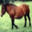

In [8]:
pic = array_to_img(x_train_all[7])
display(pic)

In [9]:
y_train_all.shape

(50000, 1)

In [10]:
y_train_all[7][0]

7

In [11]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

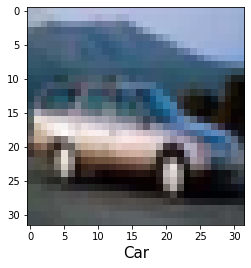

In [12]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from the ```x_train_all``` array in a row. Show the name of the label below the picture. Remove the ugly tick marks. *Hint* use matplotlib. 

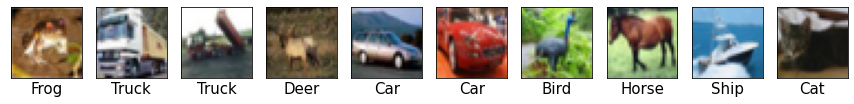

In [13]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=15)
    plt.imshow(x_train_all[i])

In [14]:
x_train_all[0].shape

(32, 32, 3)

In [15]:
x_train_all.shape

(50000, 32, 32, 3)

In [16]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [17]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [18]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [19]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [20]:
x_train_all[0][0][0][0]

0.23137254901960785

In [21]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [22]:
x_train_all.shape

(50000, 3072)

In [23]:
x_test = x_test.reshape(x_test.shape[0], TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [24]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
y_val.shape

(10000, 1)

**Challenge:** Create two numpy arrays ```x_train``` and ```y_train``` that have the shape (40000, 3072) and (40000, 1) respectively. They need to contain the last 40000 values from ```x_train_all``` and ```y_train_all``` respectively. 

In [25]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [26]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Defin the Neural Network using Keras

In [47]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [48]:
model_2 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m2_hidden1'),
    Dense(units=64, activation='relu', name='m2_hidden2'),
    Dense(units=64, activation='relu', name='m2_hidden3'),
    Dense(units=64, activation='softmax', name='m2_output'),
])

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [49]:
model_3 = Sequential([
    Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)),
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m3_hidden1'),
    Dropout(0.25, seed=42),
    Dense(units=64, activation='relu', name='m3_hidden2'),
    Dense(units=64, activation='relu', name='m3_hidden3'),
    Dense(units=64, activation='softmax', name='m3_output'),
])

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [50]:
type(model_1)

keras.engine.sequential.Sequential

In [51]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [52]:
32*32*3*128+128 + (64*128+64) + (64*16+16) + (16*10+10)

402810

# Tensorboard (visualizing learning)

In [53]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [54]:
samples_per_batch = 1000

In [55]:
%%time
nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, 
            epochs=nr_epochs, callbacks=[get_tensorboard('Model 1')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 20.5 s


In [56]:
%%time
nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 22.6 s


In [57]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 1 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 1min 11s


In [58]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 2min 14s


In [59]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs,
            callbacks=[get_tensorboard('Model 2 XL')], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
Wall time: 2min 17s


# Predictions on Individual Images

In [60]:
x_val[0].shape

(3072,)

In [61]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [62]:
np.set_printoptions(precision=3)

In [63]:
model_2.predict(test)

1/1 [==============================] - 0s 334ms/step


array([[2.170e-02, 6.374e-04, 8.070e-02, 1.042e-01, 7.788e-02, 5.055e-02,
        5.683e-01, 9.473e-02, 7.146e-04, 5.373e-04, 4.785e-12, 4.296e-12,
        1.955e-12, 5.967e-12, 7.281e-13, 7.043e-12, 2.797e-12, 1.178e-12,
        4.646e-12, 5.416e-13, 3.081e-11, 6.094e-12, 2.656e-12, 2.361e-12,
        1.573e-12, 2.809e-12, 5.062e-12, 9.018e-12, 5.255e-13, 5.030e-11,
        4.555e-12, 1.691e-12, 5.583e-12, 2.218e-12, 1.316e-12, 1.157e-12,
        8.470e-12, 5.258e-12, 3.580e-11, 7.900e-12, 5.615e-12, 4.056e-12,
        2.914e-11, 6.484e-12, 9.641e-12, 3.335e-11, 1.033e-11, 4.957e-11,
        2.726e-13, 6.467e-12, 1.035e-11, 1.593e-11, 1.356e-13, 4.195e-11,
        3.092e-13, 3.712e-13, 7.667e-12, 3.876e-12, 6.333e-12, 7.502e-12,
        9.782e-13, 1.562e-12, 1.006e-11, 1.320e-12]], dtype=float32)

In [64]:
model_2.predict(x_val).shape

313/313 [==============================] - 1s 3ms/step


(10000, 64)

In [65]:
np.argmax(model_2.predict(test), axis=-1)

1/1 [==============================] - 0s 19ms/step


array([6], dtype=int64)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset. 

In [66]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    predicted_val = np.argmax(model_2.predict(test_img)[0], axis=-1)
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

1/1 [==============================] - 0s 27ms/step
Actual value: 6 vs. predicted: 6
1/1 [==============================] - 0s 27ms/step
Actual value: 9 vs. predicted: 1
1/1 [==============================] - 0s 25ms/step
Actual value: 9 vs. predicted: 9
1/1 [==============================] - 0s 29ms/step
Actual value: 4 vs. predicted: 6
1/1 [==============================] - 0s 26ms/step
Actual value: 1 vs. predicted: 8
1/1 [==============================] - 0s 25ms/step
Actual value: 1 vs. predicted: 7
1/1 [==============================] - 0s 25ms/step
Actual value: 2 vs. predicted: 2
1/1 [==============================] - 0s 28ms/step
Actual value: 7 vs. predicted: 7
1/1 [==============================] - 0s 30ms/step
Actual value: 8 vs. predicted: 8
1/1 [==============================] - 0s 23ms/step
Actual value: 3 vs. predicted: 9


# Evaluation

In [67]:
model_1.metrics_names

['loss', 'accuracy']

In [72]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4037 - accuracy: 0.5041
Test loss is 1.4 and test accuracy is 50.4%


### Confusion Matrix

In [116]:
predictions = np.argmax(model_2.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 [==============================] - 2s 8ms/step


In [117]:
conf_matrix.shape

(10, 10)

In [118]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [119]:
conf_matrix.max()

707

In [120]:
conf_matrix.min()

5

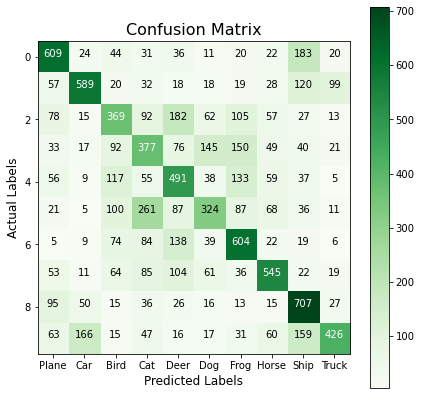

In [208]:
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.xticks(tick_marks, LABEL_NAMES)
# plt.yticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.show()

In [209]:
# True Positives
np.diag(conf_matrix)

array([609, 589, 369, 377, 491, 324, 604, 545, 707, 426], dtype=int64)

In [211]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.609, 0.589, 0.369, 0.377, 0.491, 0.324, 0.604, 0.545, 0.707,
       0.426])

In [214]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.569, 0.658, 0.405, 0.343, 0.418, 0.443, 0.504, 0.589, 0.524,
       0.658])

In [215]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:0.2%}')

Model 2 recall score is 50.41%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole. 

In [217]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:0.2%}')

Model 2 precision score is 51.12%


In [219]:
F1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 F-score is {F1_score:0.2%}')

Model 2 F-score is 50.76%
